In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [6]:
df = pd.read_csv("./data/c3.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

x = df['Consumption']
y = df['Festivals/Special_events']

In [7]:
size = int(len(x) * 0.8)

x_train, x_test = x[:size], x[size:]
y_train, y_test = y[:size], y[size:]

In [9]:
model = SARIMAX(
    x_train,
    exog=y_train,
    order=(1, 0, 2),
    seasonal_order=(1, 0, [1], 12),
)

result = model.fit()

D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likeli

In [16]:
forecast = result.get_forecast(steps=len(x_test), exog=y_test)
forecast_mean = forecast.predicted_mean

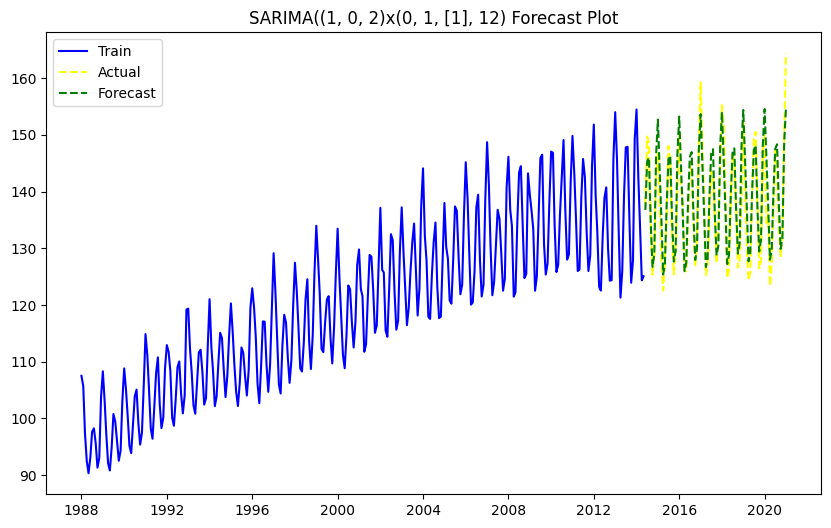

In [18]:
plt.figure(figsize=(10 ,6))
plt.plot(x_train, color='blue', label='Train')
plt.plot(x_test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast_mean, color='green', label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMA((1, 0, 2)x(0, 1, [1], 12) Forecast Plot")
plt.show()

In [20]:
mae = mean_absolute_error(x_test, forecast_mean)
mape = mean_absolute_percentage_error(x_test, forecast_mean)
rmse = mean_squared_error(x_test, forecast_mean) ** 0.5

print("MAE: ", mae)
print("MAPE: ", mape)
print("RMSE: ", rmse)

MAE:  2.8304647956621753
MAPE:  0.020453730499254703
RMSE:  3.6019125660620475
